In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("learningSet.csv")
data.head()

C:\Users\josep\AppData\Local\Temp\ipykernel_38384\1483206474.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("learningSet.csv")


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


#### Check for null values in the numerical columns.

In [3]:
categorical=data.select_dtypes(np.object)
numerical=data.select_dtypes(np.number)
numerical.head()

C:\Users\josep\AppData\Local\Temp\ipykernel_38384\3990835896.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical=data.select_dtypes(np.object)


,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0


In [4]:
nulls_df=pd.DataFrame(numerical.isna().sum()/len(numerical))
nulls_df.columns=["nulls_percentage"]

nulls_df

,nulls_percentage
ODATEDW,0.000000
TCODE,0.000000
DOB,0.000000
AGE,0.248030
NUMCHLD,0.870184
...,...
TARGET_B,0.000000
TARGET_D,0.000000
HPHONE_D,0.000000
RFA_2F,0.000000


In [5]:
pd.set_option("display.max_rows", None)
nulls_df[nulls_df["nulls_percentage"]>0.25].sort_values(by=["nulls_percentage"],ascending=False)

,nulls_percentage
RAMNT_5,0.999906
RDATE_5,0.999906
RAMNT_3,0.997464
RDATE_3,0.997464
RAMNT_4,0.997055
RDATE_4,0.997055
RDATE_6,0.991867
RAMNT_6,0.991867
RAMNT_15,0.923888
RDATE_15,0.923888


In [6]:
pd.set_option("display.max_rows", 100)

#### Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [7]:
data["GEOCODE2"].dtypes

dtype('O')

In [8]:
data["GEOCODE2"].isna().sum()/len(data["GEOCODE2"])

0.001383473776883411

In [9]:
data["GEOCODE2"]=data["GEOCODE2"].replace(" ",np.nan)

In [10]:
data["GEOCODE2"].value_counts()

A    34484
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

In [11]:
#using the mode

data["GEOCODE2"]=data["GEOCODE2"].fillna("A")

In [12]:
data["WEALTH1"].isna().sum()/len(data["WEALTH1"])

0.4688299165723389

In [13]:
data["WEALTH1"].value_counts()

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64

In [14]:
data["WEALTH1"].mean()

5.345698500394633

We should drop the entire column.

<AxesSubplot:xlabel='WEALTH1', ylabel='Count'>

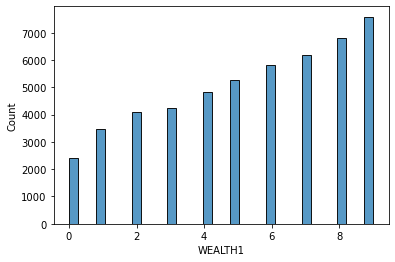

In [15]:
sns.histplot(numerical["WEALTH1"])

Actually this should be a categorical column.

In [16]:
data["WEALTH1"] = data["WEALTH1"].astype("object")

In this case lets not drop the column but replace the nans with the mode.

In [17]:
data["WEALTH1"]=data["WEALTH1"].fillna("9.0")

In [18]:
data["ADI"].isna().sum()/len(data["ADI"])

0.001383473776883411

In [19]:
data["ADI"].value_counts()

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 204, dtype: int64

<AxesSubplot:xlabel='ADI', ylabel='Count'>

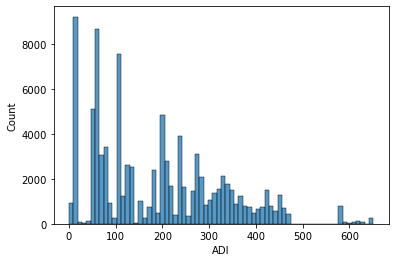

In [20]:
sns.histplot(data["ADI"])

In [21]:
data["ADI"]=data["ADI"].fillna(round(data["ADI"].mean()))

<AxesSubplot:xlabel='DMA', ylabel='Count'>

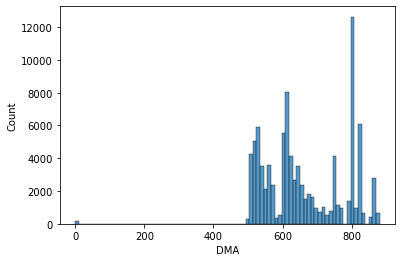

In [22]:
sns.histplot(data["DMA"])

In [23]:
data["DMA"].isna().sum()/len(data["DMA"])

0.001383473776883411

In [24]:
data["DMA"]=data["DMA"].fillna(round(data["DMA"].mean()))

<AxesSubplot:xlabel='MSA', ylabel='Count'>

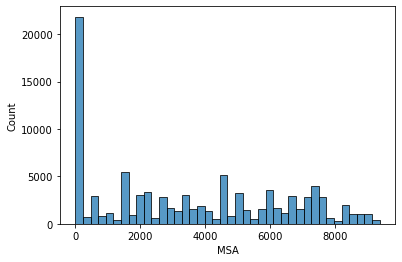

In [25]:
sns.histplot(data["MSA"])

In [26]:
data["MSA"].value_counts()

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 298, dtype: int64

In [28]:
data["MSA"].isna().sum()/len(data["MSA"])

0.001383473776883411

In [29]:
data["MSA"]=data["MSA"].fillna(round(data["MSA"].mean()))

----